<a href="https://colab.research.google.com/github/raphatrivium/Python-Introduction/blob/main/raphael_aula10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercícios

1. Quantos intervalos (ou qual largura de intervalo) é preciso implementar para ter uma precisão de 1% no resultado numérico na integração de $f(x)$ de 0 a 10? 

$\dfrac{R_{num}-R_{an}}{R_{an}} \leq 1\% $

$f(x) = \mathrm{e}^{-x}  \Rightarrow \qquad \int ^{10}_{0} f(x)dx = -1* \left(\mathrm{e}^{-10} - \mathrm{e}^{0}\right)  = 0.9999546000702375$

In [ ]:
import math
import numpy as np

def f(x):
  return math.exp(-x)

res_analit = 0.9999546000702375
compatibilidade = 10000 
x_i = 0 ; x_f = 10 ; dx = 1

while compatibilidade > 1/100:  
  if dx < 0:
    break   
  x = np.arange(x_i,x_f,dx)
  S = 0
  for i in x:
      S += f(i)*dx  
  compatibilidade = (S - res_analit)/res_analit
  print(S , compatibilidade )
  #dx = dx - 0.01 # passo
  dx = dx/10 # passo

print('Soma de', round((x_f-x_i)/dx) ,'caixinhas = ',S)
print('compatibilidade:', round(compatibilidade,4),'< 1%')
print('largura:',S/(abs(x_f-x_i)/dx))

#import matplotlib.pyplot as plt
#x = range(x_i,x_f)
#y = [math.exp(-xi) for xi in x]  # isto se chama "list comprehension"
#plt.bar(x,y,color="red",align="edge",width= 1 )
#x1 = np.linspace(x_i, x_f, 1000) # intervalo de 0 a 10, com 1000 divisões
#y1=[math.exp(-xi) for xi in x1]
#plt.plot(x1,y1)
#plt.show()

1.5819048852379485 0.5819767068693262
1.0507854867242843 0.050833194477505665
1.0049627060117017 0.005008333319445099
Soma de 10000 caixinhas =  1.0049627060117017
compatibilidade: 0.005 < 1%
largura: 0.00010049627060117017


2. Faça a integração numérica pela esquerda da mesma função. Compare o resultado com a integração pela direita.


In [ ]:
import math
import numpy as np

def Riemann(f, xi, xf , dx, method ='left' ):
  if method == 'left':
    x = np.arange( xi, xf, dx)
    S = 0
    for i in range(len(x)-1): #exclui o ultimo valor da lista
      S = S + f(x[i]) * dx  
    print('Somatório pela esquerda:',S)

  elif method == 'right':
    x = np.arange( xi, xf, dx)
    S = 0
    for i in range(1,len(x)): #exclui o primeiro valor da lista
      S = S + f(x[i]) * dx
    print('Somatório pela direita:',S)
  
  else:
    raise ValueError("Method must be 'left' or 'right'.")

def f(x):
  return math.exp(-x)

x_i = 0 ; x_f = 10 ; dx = 0.001;
Riemann(f,x_i,x_f,dx,'left')
Riemann(f,x_i,x_f,dx,'right')


Somatório pela esquerda: 1.00045461525447
Somatório pela direita: 0.9994546606998185


3. Faça a integração por trapézios. Lembre que a área de um trapézio é dada por: $A=\frac{(a + b)h}{2}$

In [ ]:
import math
import numpy as np

def trapezoidal(f, xi, xf , dx):
  x = np.arange( xi, xf, dx)
  S = 0
  for i in range(len(x)-1): #exclui o ultimo valor da lista
    S = S + ( f(x[i]) + f(x[i+1]) ) * (dx / 2)  
  print('Somatório pelo método trapezoidal:',S)

def f(x):
  return math.exp(-x)

x_i = 0 ; x_f = 10 ; dx = 0.01;
trapezoidal(f,x_i,x_f,dx)
#ver método de simpson 

Somatório pelo método trapezoidal: 0.9999624767306672


3. Faça a integração numérica das funções trigonométricas $\sin(x)$ e $\cos(x)$ num período $0 < x \leq 2\pi$

In [ ]:
import math
import numpy as np

def Riemann(f, xi, xf , dx, method ='left'):
  if method == 'left':
    x = np.arange( xi, xf, dx)
    S = 0
    for i in range(len(x)-1): #exclui o ultimo valor da lista
      S = S + f(x[i]) * dx  
    print('Somatório de Riemann pela esquerda:', round(S,4))
  
  elif method == 'right':
    x = np.arange( xi, xf, dx)
    S = 0
    for i in range(1,len(x)): #exclui o primeiro valor da lista
      S = S + f(x[i]) * dx
    print('Somatório de Riemann pela direita:', round(S,4))

  elif method == 'trapezoidal':
    x = np.arange( xi, xf, dx)
    S = 0
    for i in range(len(x)-1): #exclui o ultimo valor da lista
      S = S + ( f(x[i]) + f(x[i+1]) ) * (dx / 2)  
    print('Somatório pelo método trapezoidal:', round(S,4) )
  
  else:
    raise ValueError("Method must be 'left', 'right' or 'trapezoidal'.")

def f(x):
  return math.sin(x) #sin or cos

def analitico(xi,xf):
  a = f(xf) - f(xi)
  print('Resultado Analítico:', round(a,4) )

x_i = 0 ; x_f = 2*math.pi ; dx = 0.01;
analitico(x_i,x_f)
Riemann(f,x_i,x_f,dx,'left')
Riemann(f,x_i,x_f,dx,'right')
Riemann(f,x_i,x_f,dx,'trapezoidal')


Resultado Analítico: -0.0
Somatório de Riemann pela esquerda: 0.0
Somatório de Riemann pela direita: -0.0
Somatório pelo método trapezoidal: 0.0


Faça a integração das funções hiperbólicas  $\sinh(x)$ e $\cosh(x)$ no intervalo $0-10$.

In [ ]:
import math
import numpy as np

def Riemann(f, xi, xf , dx, method ='left'):
  if method == 'left':
    x = np.arange( xi, xf, dx)
    S = 0
    for i in range(len(x)-1): #exclui o ultimo valor da lista
      S = S + f(x[i]) * dx  
    print('Somatório de Riemann pela esquerda:', round(S,4))
  
  elif method == 'right':
    x = np.arange( xi, xf, dx)
    S = 0
    for i in range(1,len(x)): #exclui o primeiro valor da lista
      S = S + f(x[i]) * dx
    print('Somatório de Riemann pela direita:', round(S,4))

  elif method == 'trapezoidal':
    x = np.arange( xi, xf, dx)
    S = 0
    for i in range(len(x)-1): #exclui o ultimo valor da lista
      S = S + ( f(x[i]) + f(x[i+1]) ) * (dx / 2)  
    print('Somatório pelo método trapezoidal:', round(S,4) )
  
  else:
    raise ValueError("Method must be 'left', 'right' or 'trapezoidal'.")

def f(x):
  return math.cosh(x) #sinh or cosh

def analitico(xi,xf):
  a = f(xf) - f(xi)
  print('Resultado Analítico:', round(a,4) )

x_i = 0 ; x_f = 10 ; dx = 0.01;
analitico(x_i,x_f)
Riemann(f,x_i,x_f,dx,'left')
Riemann(f,x_i,x_f,dx,'right')
Riemann(f,x_i,x_f,dx,'trapezoidal')

Resultado Analítico: 11012.2329
Somatório de Riemann pela esquerda: 10849.227
Somatório de Riemann pela direita: 10958.2535
Somatório pelo método trapezoidal: 10903.7402


### Exercícios extras de resolução numérica de equações diferenciais

1. Imagine que tem um/a maratonista treinando, que num trecho de $5 km$ tem velocidade quase constante de $12 km/h$. Produza uma lista distância percorrida em intervalos de 1 minuto.

Consideremos a seguinte EDO com suas condições de contorno:

$y'' = a = \frac{d^2x}{dt^2}= 0 \;\;\;\;$ Aceleração constante

$y(0) = 0 \;\;\;\;$ Consideramos que começa do ponto S = 0

$y'(0) = 12 \;\;\;\;$ km/h

$dt = 1 \;\;\;\;$ min


Valores pelo métode Euler:
[0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2, 4.4, 4.6, 4.8, 5.0]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Valores pela solução analítica:
[0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2, 4.4, 4.6, 4.8, 5.0]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


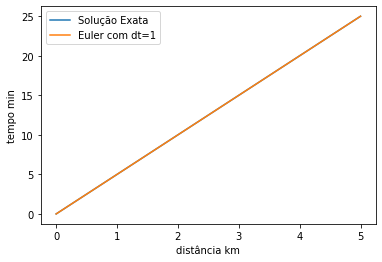

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt

def y2_prime(y2, y1, t):
  return 0
def y1_prime(y2):
  return y2

def Euler_2grau(range1, range2, dt, y1_0, y2_0):
  t = np.arange(range1, range2, dt) # Região de estudo e largura dos blocos
  y1=[]
  y1.append(y1_0) # condição de contorno y = S
  y2=[]
  y2.append(y2_0) # condição de contorno para y' = v = dS/dt
 
  for i in range(len(t)-1):  
    y1i = y1[i] + y1_prime(y2[i])*dt
    y2i = y2[i] + y2_prime(y2[i], y1[i], t[i])*dt 
    y1.append( round(y1i, 3) )  #truncar valor para até 3 casas decimais
    y2.append( round(y2i, 3) )

  print('Valores pelo métode Euler:')
  print(y1)
  print(t)
  a = [y1,t]
  return a

# Solução analítica
def distance_OneMin(S0,d,v,p):
  t = 0;  S = 0
  posicao = [] ; tempo = []
  while S < d:
    S = S0 + v*t ; 
    S = round(S, 3) #truncar valor para até 3 casas decimais
    posicao.append(S) #adiciona item à lista
    tempo.append(t)
    t = t+p
  print('Valores pela solução analítica:')
  print(posicao)
  print(tempo)
  b = [posicao, tempo]
  return b

#A DUVIDA ESTA AQUI!!!!!!!!!!!! 
#Damos como entrada o range em t (e passo dt) para solução da eq. dif.,  
#mas uma das condições de contorno é Sf = 5 km, como posso por esse limite?
#Tentei usar um if ( e break) mas nãão obtive sucesso. Meu resultados sóó estão
# bons pq eu sei até onde vai t, por isso botei t = 26 

# Método de Euler
a = Euler_2grau( 0, 26, 1, 0, 12/60 )
# S0, Sf, velocidade, passo
dt = 1
b = distance_OneMin(0,5,12/60, dt)

plt.plot(b[0], b[1], label='Solução Exata')
plt.plot(a[0], a[1], label='Euler com dt=%s' % dt )
plt.xlabel("distância km")
plt.ylabel("tempo min")
plt.legend()